### Group Members - Takondwa Gama(bsc-act-hon-03-18), Gift-Jamie Mawerenga(bsc-act-hon-12-18),Precious Nliwasa(bsc-act-hon-10-18)

#### --------------------------------

### BSC/ACT/HON/12/18
### -----------------------------
### Gift-jamie Mawerenga
### -----------------------------
##### Mortality Rate exercise

In [105]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

In [106]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [107]:
import warnings
warnings.filterwarnings('ignore')

In [108]:
#Setting Defaults
plt.style.use("seaborn-whitegrid")
plt.rc(
    "figure",
    autolayout=True,
    figsize=(13, 4),
    titlesize=18,
    titleweight='bold',
)
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=16,
    titlepad=10,
)
%config InlineBackend.figure_format = 'retina'

### Question A

In [109]:
df = pd.read_csv(r'C:\Users\user\Downloads\Assignment\Assignment\mortrate.csv')

In [110]:
df

,yearcode,mortrate
0,1/1/1960,448.651
1,1/1/1961,446.245
2,1/1/1962,443.839
3,1/1/1963,441.700
4,1/1/1964,439.561
...,...,...
57,1/1/2017,331.044
58,1/1/2018,325.106
59,1/1/2019,318.892
60,1/1/2020,312.678


In [111]:
df.yearcode = pd.to_datetime(df.yearcode)

In [112]:
df.head()

,yearcode,mortrate
0,1960-01-01,448.651
1,1961-01-01,446.245
2,1962-01-01,443.839
3,1963-01-01,441.700
4,1964-01-01,439.561


In [113]:
df.tail()

,yearcode,mortrate
57,2017-01-01,331.044
58,2018-01-01,325.106
59,2019-01-01,318.892
60,2020-01-01,312.678
61,NaT,NaN


In [114]:
df.dropna(inplace = True)

#### Question B

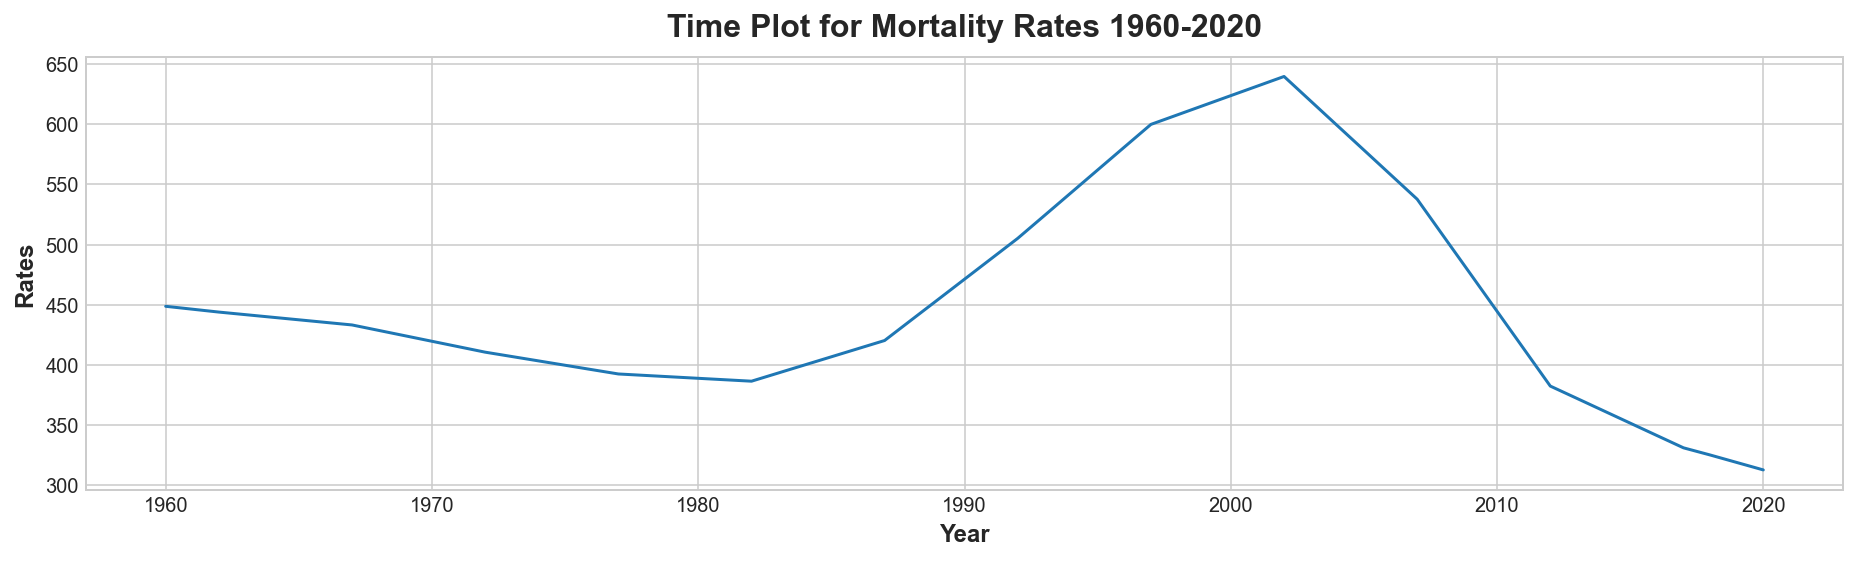

In [115]:
plt.plot(df.yearcode,df.mortrate,label = 'mortality rates')
plt.xlabel('Year')
plt.ylabel('Rates')
plt.title('Time Plot for Mortality Rates 1960-2020')
plt.show()

##### An erruption of a sexually transmitted disease called AIDS caused by a virus known as HIV might have been the cause. The disease has no cure. The reason why the mortality rates decreased in early 2000s is  because of introduction of drugs called ARVs.These drugs don’t cure HIV, but they can reduce the amount of virus in the body of someone living with HIV. This keeps the immune system strong enough to fight off disease. People after early 2000s were using ARVs therefore mortality rates decreased.

#### Question C

In [116]:
df['Diff'] = df.mortrate.diff()

In [117]:
df.head()

,yearcode,mortrate,Diff
0,1960-01-01,448.651,NaN
1,1961-01-01,446.245,-2.406
2,1962-01-01,443.839,-2.406
3,1963-01-01,441.700,-2.139
4,1964-01-01,439.561,-2.139


In [118]:
df.tail()

,yearcode,mortrate,Diff
56,2016-01-01,341.306,-10.262
57,2017-01-01,331.044,-10.262
58,2018-01-01,325.106,-5.938
59,2019-01-01,318.892,-6.214
60,2020-01-01,312.678,-6.214


#### Question D

In [119]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

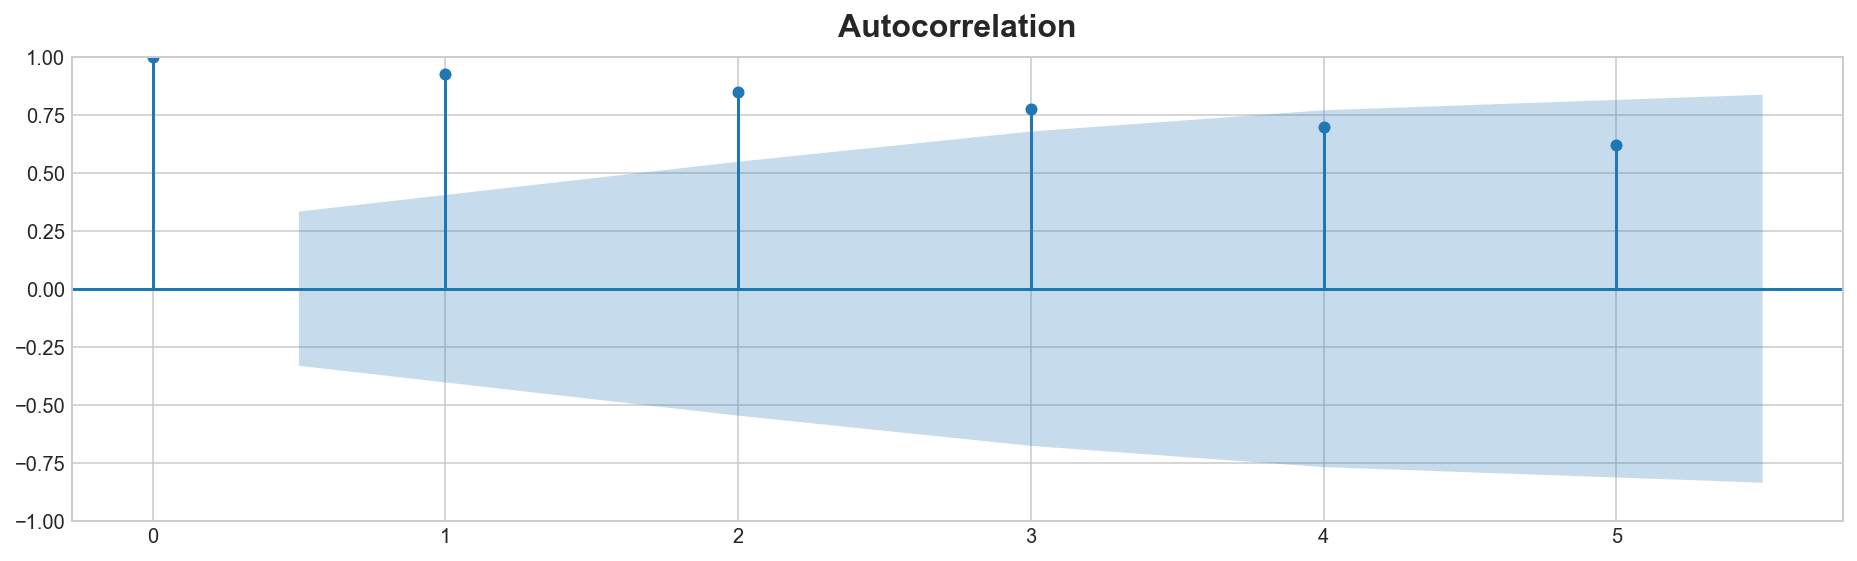

In [120]:
plot_acf(df.Diff.dropna(),alpha = 0.01,lags = 5)
plt.show()

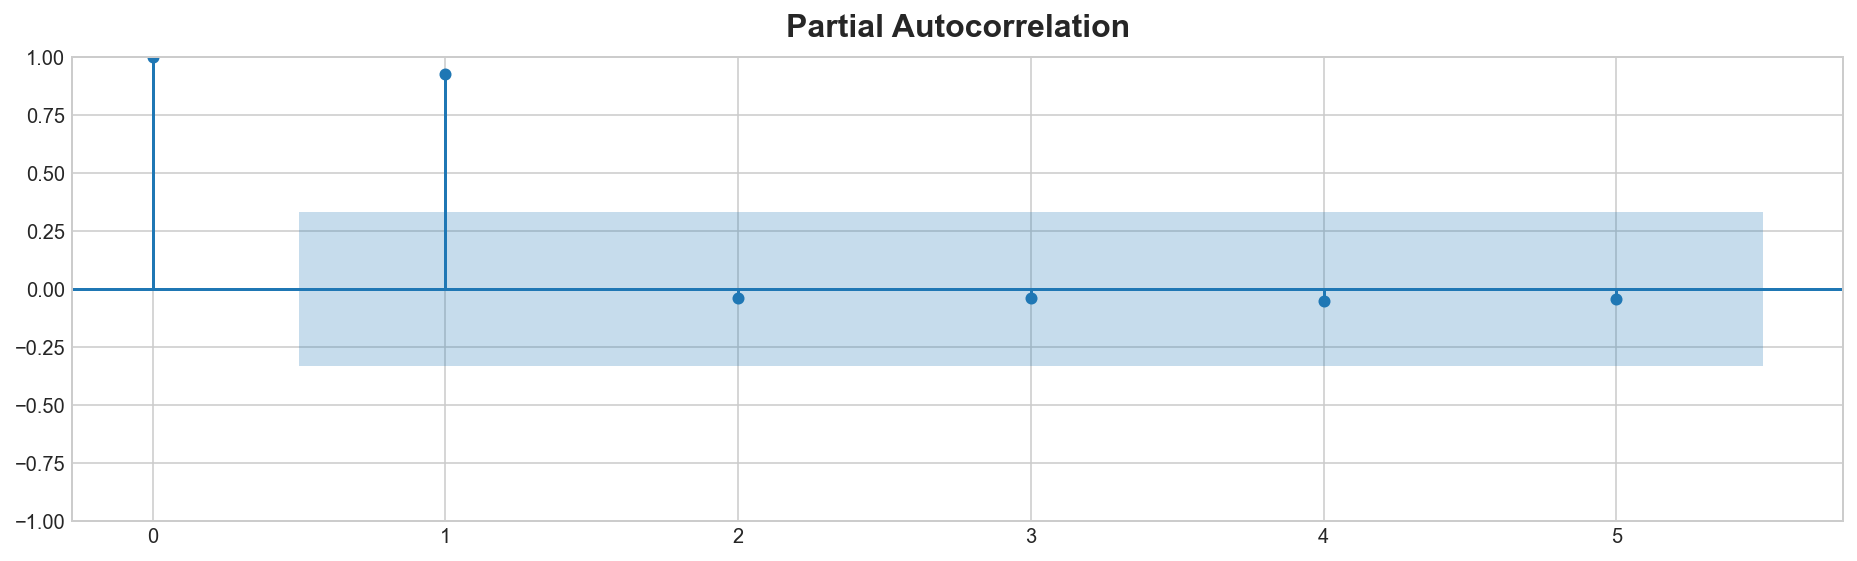

In [121]:
plot_pacf(df.Diff.dropna(),alpha = 0.01,lags = 5,method = 'ywm')
plt.show()

In [122]:
# suggestions :  AR(2),AR(1) ,MA(2),MA(3),MA(4)

#### Question E 

In [123]:
#Estimate the AR (2)
from statsmodels.tsa.arima_model import ARIMA
model_1 = sm.tsa.arima.ARIMA(df['Diff'], order=(2, 0, 0))
resid_1 = model_1.fit()
print(resid_1.summary())

                               SARIMAX Results                                
Dep. Variable:                   Diff   No. Observations:                   61
Model:                 ARIMA(2, 0, 0)   Log Likelihood                -184.760
Date:                Wed, 21 Dec 2022   AIC                            377.520
Time:                        02:57:02   BIC                            385.964
Sample:                             0   HQIC                           380.829
                                 - 61                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.7689      9.415     -0.294      0.769     -21.223      15.685
ar.L1          0.9463      0.562      1.684      0.092      -0.155       2.047
ar.L2         -0.0358      0.567     -0.063      0.9

###### AIC = 377.520, BIC = 385

###### Ljung-Box statistic is 0.01 which is very low. It can be said that innovations are white noise.

In [124]:
#Estimate the MA (2)
from statsmodels.tsa.arima_model import ARIMA
model_2 = sm.tsa.arima.ARIMA(df['Diff'], order=(0, 0, 2))
resid_2 = model_2.fit()
print(resid_2.summary())

                               SARIMAX Results                                
Dep. Variable:                   Diff   No. Observations:                   61
Model:                 ARIMA(0, 0, 2)   Log Likelihood                -199.577
Date:                Wed, 21 Dec 2022   AIC                            407.155
Time:                        02:57:03   BIC                            415.598
Sample:                             0   HQIC                           410.464
                                 - 61                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.2052      2.650     -0.832      0.405      -7.399       2.989
ma.L1          0.6843     20.039      0.034      0.973     -38.592      39.960
ma.L2          0.9999     58.507      0.017      0.9

###### AIC = 407.155, BIC = 414.598

###### Ljung-Box statistic is 16.84 which is higher than that of AR(2). It can be said that innovations are not white noise

In [125]:
#Estimate the MA (3)
from statsmodels.tsa.arima_model import ARIMA
model_3 = sm.tsa.arima.ARIMA(df['Diff'], order=(0, 0, 3))
resid_3 = model_3.fit()
print(resid_3.summary())

                               SARIMAX Results                                
Dep. Variable:                   Diff   No. Observations:                   61
Model:                 ARIMA(0, 0, 3)   Log Likelihood                -187.110
Date:                Wed, 21 Dec 2022   AIC                            384.221
Time:                        02:57:04   BIC                            394.775
Sample:                             0   HQIC                           388.357
                                 - 61                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.1921      4.007     -0.547      0.584     -10.046       5.661
ma.L1          1.5448     13.583      0.114      0.909     -25.078      28.167
ma.L2          1.5450     64.584      0.024      0.9

###### AIC = 384.221, BIC = 394.775

###### Ljung-Box statistic is 1.03 which is very low.

In [126]:
#Estimate the MA (4)
from statsmodels.tsa.arima_model import ARIMA
model_4 = sm.tsa.arima.ARIMA(df['Diff'], order=(0, 0, 4))
resid_4 = model_4.fit()
print(resid_4.summary())

                               SARIMAX Results                                
Dep. Variable:                   Diff   No. Observations:                   61
Model:                 ARIMA(0, 0, 4)   Log Likelihood                -186.629
Date:                Wed, 21 Dec 2022   AIC                            385.259
Time:                        02:57:04   BIC                            397.924
Sample:                             0   HQIC                           390.222
                                 - 61                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.2715      3.687     -0.616      0.538      -9.499       4.956
ma.L1          1.4508      5.590      0.260      0.795      -9.505      12.406
ma.L2          1.3957     25.014      0.056      0.9

###### AIC = 385.259, BIC = 397.924

###### Ljung-Box statistic is 0.01 which is very low. It can be said that innovations are white noise

In [127]:
#Estimate the AR (1)
from statsmodels.tsa.arima_model import ARIMA
model_5 = sm.tsa.arima.ARIMA(df['Diff'], order=(1, 0, 0))
resid_5 = model_5.fit()
print(resid_5.summary())

                               SARIMAX Results                                
Dep. Variable:                   Diff   No. Observations:                   61
Model:                 ARIMA(1, 0, 0)   Log Likelihood                -184.800
Date:                Wed, 21 Dec 2022   AIC                            375.599
Time:                        02:57:05   BIC                            381.932
Sample:                             0   HQIC                           378.081
                                 - 61                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.7962      9.658     -0.290      0.772     -21.725      16.133
ar.L1          0.9129      0.053     17.168      0.000       0.809       1.017
sigma2        26.9024      2.780      9.676      0.0

###### AIC = 375.599, BIC = 381.932, Suggesting use of AR(1) because it has lowest AIC and BIC

###### Ljung-Box statistic is 0.15 which is very low. It can be said that innovations are white noise

#### Question F

In [128]:
df = df[1:].reset_index(drop=True) # reindexing

In [129]:
df2 = df

In [130]:
nforecasts = 2  
forecasts = {}   

nobs = len(df.Diff)
n_init_training = int(nobs * 0.9)  

init_training_mortality = df.Diff.iloc[:n_init_training]  
mod = sm.tsa.arima.ARIMA(init_training_mortality, order=(1, 0, 0))  
res = mod.fit()

forecasts[init_training_mortality.index[-1]] = res.forecast(steps=nforecasts)

for t in range(n_init_training, nobs):
    
    updated_mortality = df.Diff.iloc[t:t+1]
    res = res.append(updated_mortality, refit=True)
    
    forecasts[updated_mortality.index[0]] = res.forecast(steps=nforecasts)

forecasts = pd.concat(forecasts, axis=1)

print(forecasts.iloc[:6, :6])


          53        54        55        56        57        58
54 -9.620787       NaN       NaN       NaN       NaN       NaN
55 -9.035632 -9.633735       NaN       NaN       NaN       NaN
56       NaN -9.060902 -9.647735       NaN       NaN       NaN
57       NaN       NaN -9.086398 -9.660192       NaN       NaN
58       NaN       NaN       NaN -9.109888 -5.651050       NaN
59       NaN       NaN       NaN       NaN -5.389284 -5.911565


In [131]:
n_init_training

54

In [132]:
def flatten(column):
    return column.dropna().reset_index(drop=True)   

In [133]:
# Flattening the results
forecast_2 = forecasts.apply(lambda column: column).reindex(forecasts.index) 
flattened2 = forecast_2.apply(flatten)
flattened2.index = (flattened2.index + 1 ).rename('horizon') 
print(flattened2.iloc[:4, :6])

               53        54        55        56        57        58
horizon                                                            
1       -9.620787 -9.633735 -9.647735 -9.660192 -5.651050 -5.911565
2       -9.035632 -9.060902 -9.086398 -9.109888 -5.389284 -5.635561


In [134]:
pivoted_forecasts=flattened2.T

pivoted_forecasts

horizon,1,2
53,-9.620787,-9.035632
54,-9.633735,-9.060902
55,-9.647735,-9.086398
56,-9.660192,-9.109888
57,-5.651050,-5.389284
58,-5.911565,-5.635561
59,-5.916168,-5.644282


In [135]:
mortality_forecast=pd.concat([df,pivoted_forecasts],axis=1)
mortality_forecast[52:]

,yearcode,mortrate,Diff,1,2
52,2013-01-01,372.091,-10.262,NaN,NaN
53,2014-01-01,361.829,-10.262,-9.620787,-9.035632
54,2015-01-01,351.568,-10.261,-9.633735,-9.060902
55,2016-01-01,341.306,-10.262,-9.647735,-9.086398
56,2017-01-01,331.044,-10.262,-9.660192,-9.109888
57,2018-01-01,325.106,-5.938,-5.651050,-5.389284
58,2019-01-01,318.892,-6.214,-5.911565,-5.635561
59,2020-01-01,312.678,-6.214,-5.916168,-5.644282


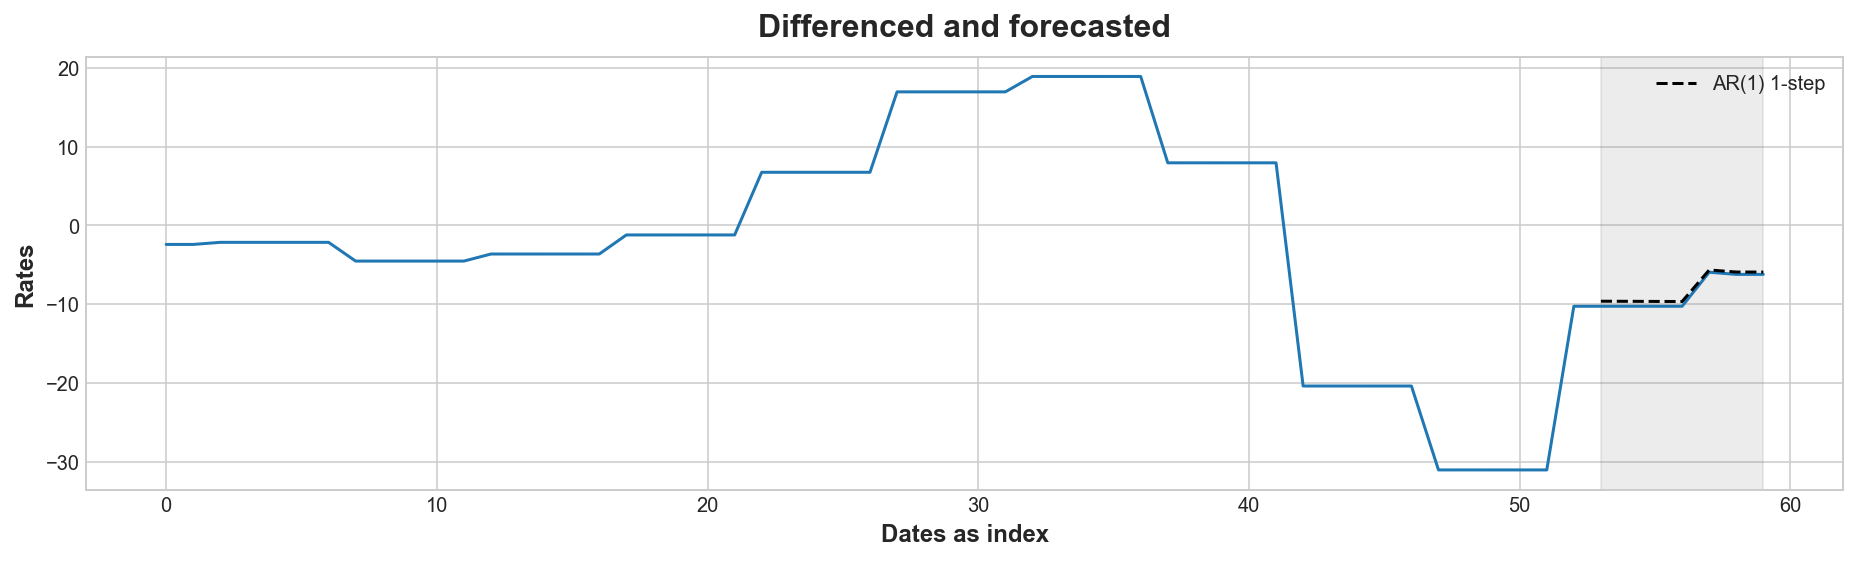

In [136]:
fig, ax = plt.subplots()

ax.plot(mortality_forecast['Diff'])
ax.plot(mortality_forecast[1], 'k--', label='AR(1) 1-step')
plt.xlabel('Dates as index')
plt.ylabel('Rates')
plt.title('Differenced and forecasted')
ax.axvspan(53, 59, color='#808080', alpha=0.15)

ax.legend(loc=1)


plt.show()

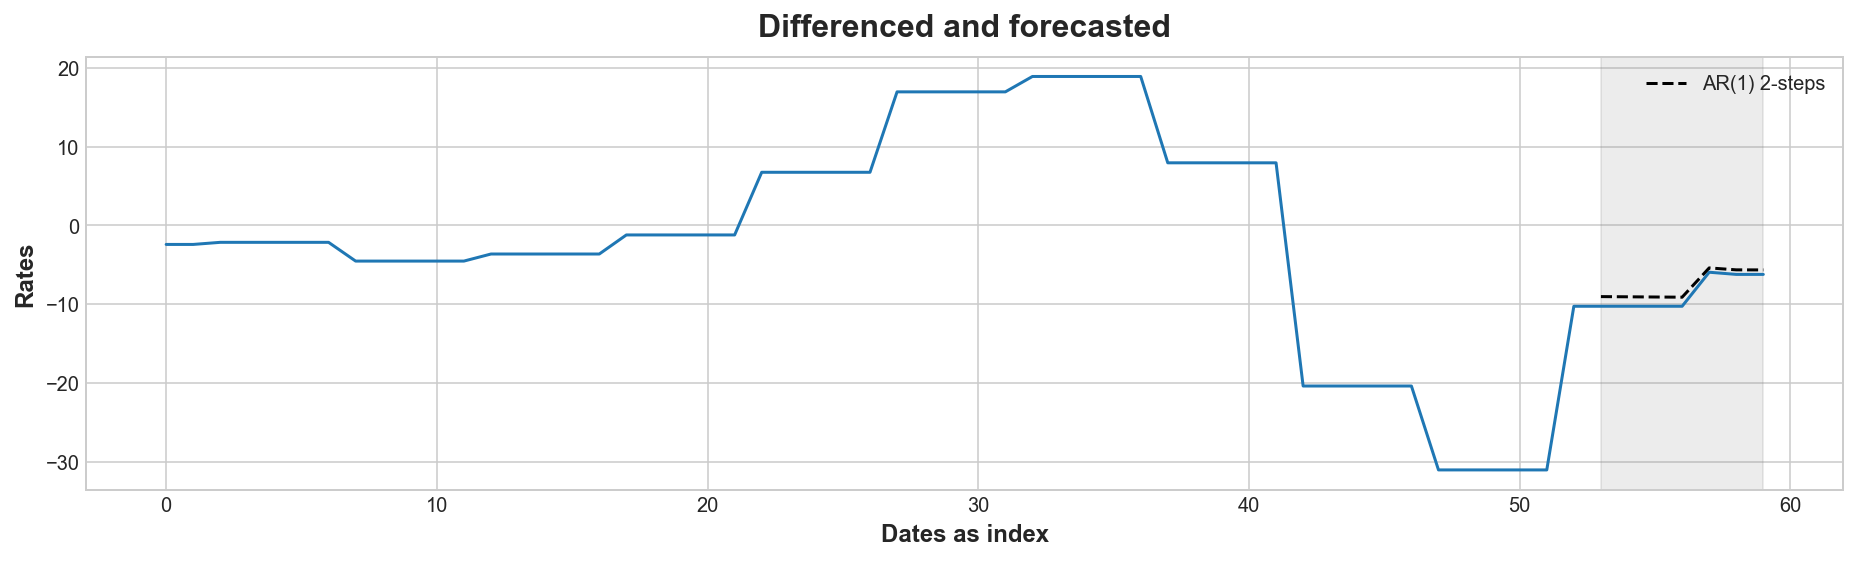

In [137]:
fig, ax = plt.subplots()

ax.plot(mortality_forecast['Diff'])
ax.plot(mortality_forecast[2], 'k--', label='AR(1) 2-steps')
plt.xlabel('Dates as index')
plt.ylabel('Rates')
plt.title('Differenced and forecasted')
ax.axvspan(53, 59, color='#808080', alpha=0.15)

ax.legend(loc=1)


plt.show()

In [138]:
forecast_errors = forecasts.apply(lambda column: mortality_forecast.Diff - column).reindex(forecasts.index)

print(forecast_errors.iloc[:5, :5])

          53        54        55        56       57
54 -0.640213       NaN       NaN       NaN      NaN
55 -1.226368 -0.628265       NaN       NaN      NaN
56       NaN -1.201098 -0.614265       NaN      NaN
57       NaN       NaN  3.148398  3.722192      NaN
58       NaN       NaN       NaN  2.895888 -0.56295


In [139]:
flattened = forecast_errors.apply(flatten)
flattened.index = (flattened.index + 1).rename('horizon')

print(flattened.iloc[:4, :5])

               53        54        55        56        57
horizon                                                  
1       -0.640213 -0.628265 -0.614265  3.722192 -0.562950
2       -1.226368 -1.201098  3.148398  2.895888 -0.824716


#### Question G

In [140]:
# root mean square error (RMSE)
rmse = (flattened**2).mean(axis=1)**0.5

print(rmse)

horizon
1    1.604421
2    2.094056
dtype: float64


In [141]:
# one step is superior

In [142]:
# Compute the mean absolute error (MAE)
mae = (abs(flattened).mean(axis=1))

print(mae)

horizon
1    1.078387
2    1.859294
dtype: float64


In [143]:
# one step is superior

#### Question H

In [144]:
def to_original_scale(initial_value,column):
    
    original_data = np.r_[initial_value,column].cumsum()
    return original_data

In [145]:
# differenced data to original scale

to_original_scale(448.651,mortality_forecast.Diff)

array([448.651, 446.245, 443.839, 441.7  , 439.561, 437.422, 435.283,
       433.144, 428.622, 424.1  , 419.578, 415.056, 410.534, 406.911,
       403.287, 399.663, 396.04 , 392.416, 391.215, 390.015, 388.814,
       387.614, 386.413, 393.175, 399.937, 406.699, 413.461, 420.223,
       437.204, 454.185, 471.166, 488.147, 505.128, 524.064, 543.   ,
       561.936, 580.871, 599.807, 607.771, 615.736, 623.7  , 631.664,
       639.628, 619.232, 598.836, 578.44 , 558.043, 537.647, 506.588,
       475.53 , 444.471, 413.412, 382.353, 372.091, 361.829, 351.568,
       341.306, 331.044, 325.106, 318.892, 312.678])

In [146]:
df.head(10)

,yearcode,mortrate,Diff
0,1961-01-01,446.245,-2.406
1,1962-01-01,443.839,-2.406
2,1963-01-01,441.700,-2.139
3,1964-01-01,439.561,-2.139
4,1965-01-01,437.422,-2.139
5,1966-01-01,435.283,-2.139
6,1967-01-01,433.144,-2.139
7,1968-01-01,428.622,-4.522
8,1969-01-01,424.100,-4.522
9,1970-01-01,419.578,-4.522


In [147]:
mortality_forecast.tail(10)

,yearcode,mortrate,Diff,1,2
50,2011-01-01,413.412,-31.059,NaN,NaN
51,2012-01-01,382.353,-31.059,NaN,NaN
52,2013-01-01,372.091,-10.262,NaN,NaN
53,2014-01-01,361.829,-10.262,-9.620787,-9.035632
54,2015-01-01,351.568,-10.261,-9.633735,-9.060902
55,2016-01-01,341.306,-10.262,-9.647735,-9.086398
56,2017-01-01,331.044,-10.262,-9.660192,-9.109888
57,2018-01-01,325.106,-5.938,-5.651050,-5.389284
58,2019-01-01,318.892,-6.214,-5.911565,-5.635561
59,2020-01-01,312.678,-6.214,-5.916168,-5.644282


In [148]:
# forecasts to original

forecasts_to_original = pd.Series(to_original_scale(372.091,mortality_forecast[1][53::]))[1::].reset_index(drop = True)
forecasts_to_original

0    362.470213
1    352.836478
2    343.188743
3    333.528551
4    327.877500
5    321.965935
6    316.049767
dtype: float64

In [149]:
# original, tail(7)

tail_7_original = pd.Series(mortality_forecast['mortrate'][53::]).reset_index(drop = True)
tail_7_original

0    361.829
1    351.568
2    341.306
3    331.044
4    325.106
5    318.892
6    312.678
Name: mortrate, dtype: float64

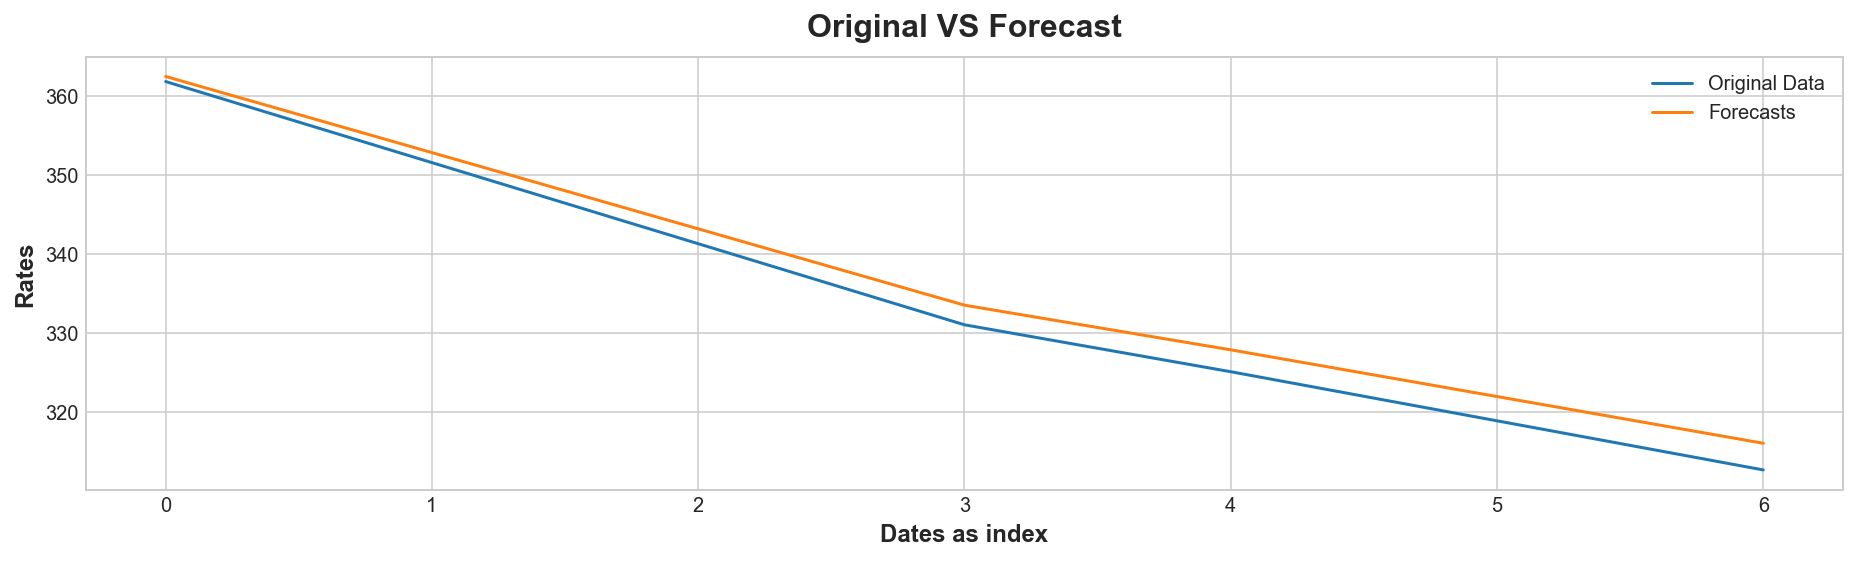

In [150]:
# original VS Forecast

plt.plot(tail_7_original,label = 'Original Data')
plt.plot(forecasts_to_original,label = 'Forecasts')
plt.xlabel('Dates as index')
plt.ylabel('Rates')
plt.title('Original VS Forecast')
plt.legend()
plt.show()

#### Question I

In [151]:
nforecasts2 = 50   # 50 steps ahead
forecasts2 = {}   

mod2 = sm.tsa.arima.ARIMA(init_training_mortality, order=(1, 0, 0))
res2 = mod2.fit()

forecasts2[init_training_mortality.index[-1]] = res2.forecast(steps=nforecasts2)

for t in range(n_init_training, nobs):
    
    updated_mortality2 = df.Diff.iloc[t:t+1]
    res2 = res2.append(updated_mortality2, refit=True)
    
    forecasts2[updated_mortality2.index[0]] = res2.forecast(steps=nforecasts2)

forecasts2 = pd.concat(forecasts2, axis=1)

print(forecasts2.iloc[:10, :10])

          53        54        55        56        57        58        59
54 -9.620787       NaN       NaN       NaN       NaN       NaN       NaN
55 -9.035632 -9.633735       NaN       NaN       NaN       NaN       NaN
56 -8.501637 -9.060902 -9.647735       NaN       NaN       NaN       NaN
57 -8.014326 -8.537777 -9.086398 -9.660192       NaN       NaN       NaN
58 -7.569620 -8.060046 -8.573429 -9.109888 -5.651050       NaN       NaN
59 -7.163793 -7.623771 -8.104661 -8.606680 -5.389284 -5.911565       NaN
60 -6.793447 -7.225353 -7.676283 -8.146538 -5.150490 -5.635561 -5.916168
61 -6.455478 -6.861509 -7.284817 -7.725775 -4.932652 -5.383678 -5.644282
62 -6.147057 -6.529238 -6.927081 -7.341022 -4.733932 -5.153807 -5.396082
63 -5.865601 -6.225799 -6.600170 -6.989197 -4.552652 -4.944025 -5.169505


In [152]:
forecast_50 = forecasts2.apply(lambda column: column).reindex(forecasts2.index) 
flattened50 = forecast_50.apply(flatten) 
flattened50.index = (flattened50.index + 1 ).rename('horizon') 
print(flattened50.iloc[:4, :6])

               53        54        55        56        57        58
horizon                                                            
1       -9.620787 -9.633735 -9.647735 -9.660192 -5.651050 -5.911565
2       -9.035632 -9.060902 -9.086398 -9.109888 -5.389284 -5.635561
3       -8.501637 -8.537777 -8.573429 -8.606680 -5.150490 -5.383678
4       -8.014326 -8.060046 -8.104661 -8.146538 -4.932652 -5.153807


In [153]:
pivoted_forecasts2 = flattened50.T

pivoted_forecasts2

horizon,1,2,3,4,5,6,7,8,9,10,...,41,42,43,44,45,46,47,48,49,50
53,-9.620787,-9.035632,-8.501637,-8.014326,-7.569620,-7.163793,-6.793447,-6.455478,-6.147057,-5.865601,...,-3.100042,-3.084976,-3.071228,-3.058682,-3.047233,-3.036785,-3.027250,-3.018548,-3.010608,-3.003362
54,-9.633735,-9.060902,-8.537777,-8.060046,-7.623771,-7.225353,-6.861509,-6.529238,-6.225799,-5.948692,...,-3.207301,-3.192126,-3.178268,-3.165612,-3.154055,-3.143501,-3.133862,-3.125060,-3.117021,-3.109681
55,-9.647735,-9.086398,-8.573429,-8.104661,-7.676283,-7.284817,-6.927081,-6.600170,-6.301428,-6.028426,...,-3.310331,-3.295058,-3.281101,-3.268346,-3.256690,-3.246039,-3.236305,-3.227411,-3.219282,-3.211854
56,-9.660192,-9.109888,-8.606680,-8.146538,-7.725775,-7.341022,-6.989197,-6.667482,-6.373300,-6.104294,...,-3.409523,-3.394163,-3.380117,-3.367273,-3.355529,-3.344790,-3.334969,-3.325990,-3.317778,-3.310270
57,-5.651050,-5.389284,-5.150490,-4.932652,-4.733932,-4.552652,-4.387281,-4.236423,-4.098805,-3.973264,...,-2.743984,-2.737343,-2.731284,-2.725757,-2.720715,-2.716116,-2.711920,-2.708092,-2.704601,-2.701415
58,-5.911565,-5.635561,-5.383678,-5.153807,-4.944025,-4.752576,-4.577858,-4.418410,-4.272896,-4.140098,...,-2.834775,-2.827658,-2.821163,-2.815236,-2.809827,-2.804890,-2.800385,-2.796274,-2.792522,-2.789098
59,-5.916168,-5.644282,-5.396082,-5.169505,-4.962666,-4.773847,-4.601478,-4.444125,-4.300480,-4.169349,...,-2.876714,-2.869618,-2.863141,-2.857228,-2.851830,-2.846903,-2.842404,-2.838298,-2.834549,-2.831127


In [154]:
mortality_forecast2 = pd.concat([df2,pivoted_forecasts2],axis=1)
mortality_forecast2[52:]

,yearcode,mortrate,Diff,1,2,3,4,5,6,7,...,41,42,43,44,45,46,47,48,49,50
52,2013-01-01,372.091,-10.262,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
53,2014-01-01,361.829,-10.262,-9.620787,-9.035632,-8.501637,-8.014326,-7.569620,-7.163793,-6.793447,...,-3.100042,-3.084976,-3.071228,-3.058682,-3.047233,-3.036785,-3.027250,-3.018548,-3.010608,-3.003362
54,2015-01-01,351.568,-10.261,-9.633735,-9.060902,-8.537777,-8.060046,-7.623771,-7.225353,-6.861509,...,-3.207301,-3.192126,-3.178268,-3.165612,-3.154055,-3.143501,-3.133862,-3.125060,-3.117021,-3.109681
55,2016-01-01,341.306,-10.262,-9.647735,-9.086398,-8.573429,-8.104661,-7.676283,-7.284817,-6.927081,...,-3.310331,-3.295058,-3.281101,-3.268346,-3.256690,-3.246039,-3.236305,-3.227411,-3.219282,-3.211854
56,2017-01-01,331.044,-10.262,-9.660192,-9.109888,-8.606680,-8.146538,-7.725775,-7.341022,-6.989197,...,-3.409523,-3.394163,-3.380117,-3.367273,-3.355529,-3.344790,-3.334969,-3.325990,-3.317778,-3.310270
57,2018-01-01,325.106,-5.938,-5.651050,-5.389284,-5.150490,-4.932652,-4.733932,-4.552652,-4.387281,...,-2.743984,-2.737343,-2.731284,-2.725757,-2.720715,-2.716116,-2.711920,-2.708092,-2.704601,-2.701415
58,2019-01-01,318.892,-6.214,-5.911565,-5.635561,-5.383678,-5.153807,-4.944025,-4.752576,-4.577858,...,-2.834775,-2.827658,-2.821163,-2.815236,-2.809827,-2.804890,-2.800385,-2.796274,-2.792522,-2.789098
59,2020-01-01,312.678,-6.214,-5.916168,-5.644282,-5.396082,-5.169505,-4.962666,-4.773847,-4.601478,...,-2.876714,-2.869618,-2.863141,-2.857228,-2.851830,-2.846903,-2.842404,-2.838298,-2.834549,-2.831127


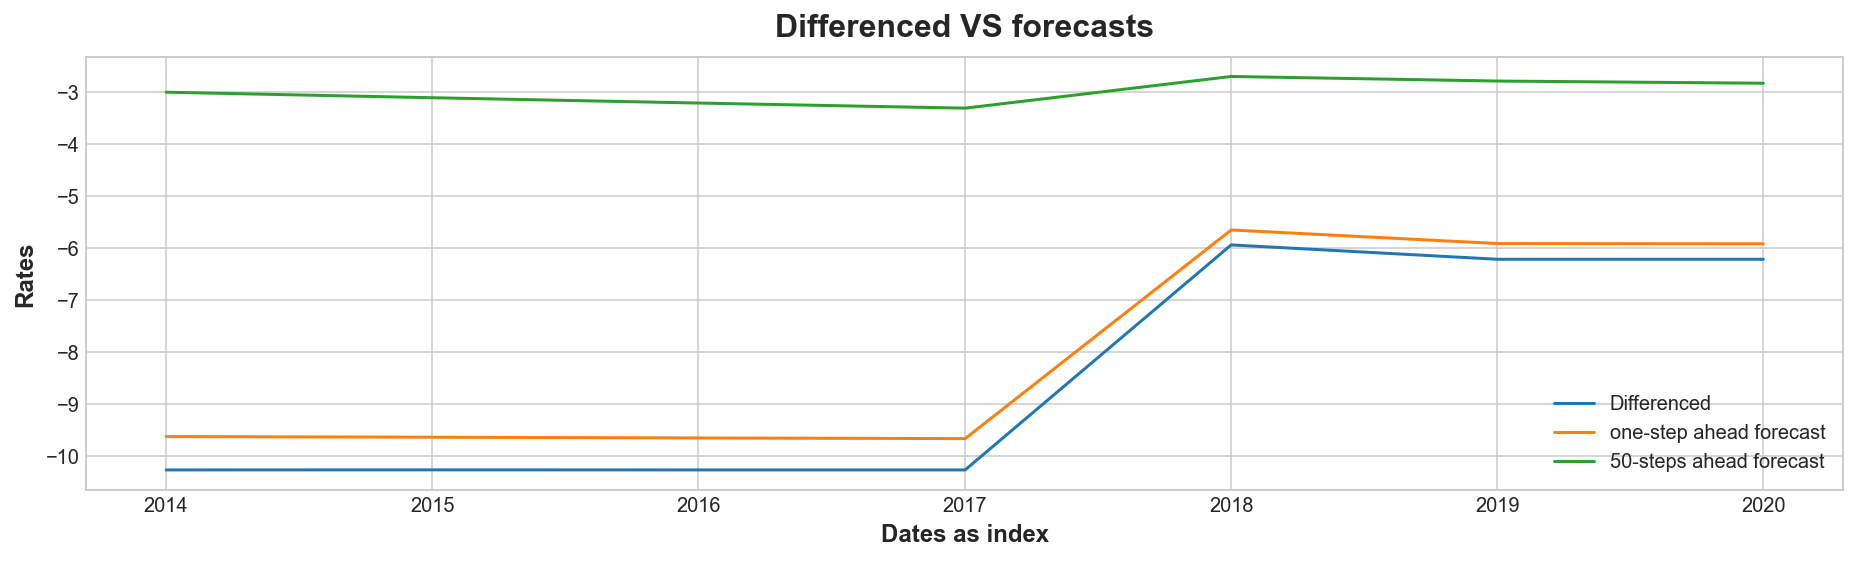

In [155]:
# differenced vs one-step and 2-steps ahead

plt.plot(mortality_forecast2.dropna().yearcode,mortality_forecast2.dropna().Diff,label = 'Differenced')
plt.plot(mortality_forecast2.dropna().yearcode,mortality_forecast2.dropna()[1],label = 'one-step ahead forecast')
plt.plot(mortality_forecast2.dropna().yearcode,mortality_forecast2.dropna()[50],label = '50-steps ahead forecast')
plt.xlabel('Dates as index')
plt.ylabel('Rates')
plt.title('Differenced VS forecasts')
plt.legend()
plt.show()

##### One step ahead predictions are more close to the differenced data than the 50 steps ahead forecasts.  This is because 50 steps ahead forecasts  uses more predicted values from the past than the one step ahead approach, making it prone to error accumulation problem. This means in 50-steps ahead approach,many errors made in the past are brought into future forecasts as compared to the one-step approach.